# Telecom Customer Churn Analysis and Prediction
Customer Churn, or Customer Attrition, refers to the rate at which customers become disinterested toward a certain company. Therefore, it is better to have a low churn rate since it equates to better client retainment. Generally speaking, customer attrition analysis are frequently used as essential business indicators by companies since the cost of maintaining an existing customer is significantly less than the cost of obtaining a new one. In this case, the analysis focuses on telecommunications field, utilizing consumer data such as call duration and membership plans to understand when and why do attrition occur. 


## Explanatory Features
1. State: identifies the region where the customer resides
2. Account length: number of days the account has been actived
3. Area code: three-digit area code of the corresponding customer’s phone number
4. International plan: a binary classification; dictates whether or not the client has an international plan
5. Voice mail plan: a binary classification; dictates whether or not the client has a voice mail plan
6. Number vmail messages: average number of voice mail messages
7. Total day minutes: elapsed calling minutes used in the day 
8. Total day calls: number of calls during the day
9. Total day charge: amount charged for day calls
10. Total eve minutes: elapsed calling minutes used in the evening
11. Total eve calls: number of calls during the evening
12. Total eve charge: amount charged for evening calls
13. Total night minutes: elpased calling minutes during the night
14. Total night calls: number of calls during the night
15. Total night charge: amount charged for night calls
16. Total intl minutes: elapsed minutes for international calls
17. Total intl calls: number of international calls
18. Total intl charge: amount charged for international calls
19. Customer service calls: number of calls to Customer Service

## Target Feature
Churn: a binary classification; indicates whether the customer has churned or not.

# Importing Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings

warnings.filterwarnings("ignore")

# Data Cleaning

In [2]:
df_train = pd.read_csv('dataset_11_telecomchurn_train.csv')
df_test = pd.read_csv('dataset_11_telecomchurn_test.csv')

In [3]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [7]:
print('Number of duplicates in TRAINING set:', df_train.duplicated().sum())
print('Number of duplicates in TEST set:', df_test.duplicated().sum())

Number of duplicates in TRAINING set: 0
Number of duplicates in TEST set: 0


For starters, there are neither null nor duplicate values within both datasets.

The dataset is initially designed in accordance with the Pareto Principle: 80% of the total dataset is categorized as the training set while 20% is the test set. This distinction is particularly important when creating and evaluating models. However, these two data frames will be first joined for exploratory data analysis. 

In [8]:
df = pd.concat([df_train, df_test]).reset_index()
df.drop('index', axis=1, inplace=True)
df.shape

(3333, 20)

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

df.shape

(3333, 20)

# Understanding Churn Attribute

In [10]:
print('There are %d unique values within the Churn Attribute' %(df['Churn'].nunique()))
df['Churn'].unique()

There are 2 unique values within the Churn Attribute


array([False,  True])

<AxesSubplot:ylabel='Churn'>

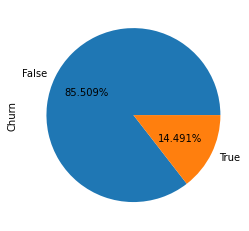

In [11]:
df['Churn'].value_counts().plot(kind='pie', y='count', autopct='%.3f%%')

The dataset is mainly comprised of customers who remained with the company at 85.509%.

# Understanding State Attribute

In [12]:
print('There are %d unique values within the State Attribute' %(df['State'].nunique()))
df['State'].unique()

There are 51 unique values within the State Attribute


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

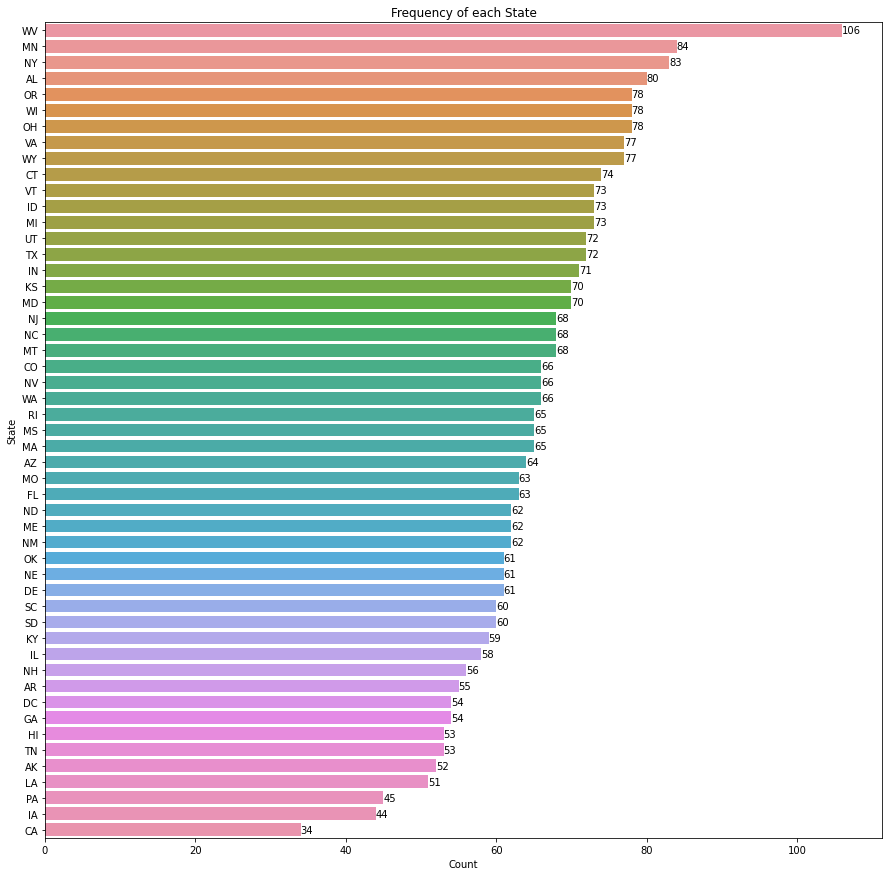

In [13]:
freq_state = df.groupby('State', as_index=False)['State'].value_counts().sort_values(by='count', ascending=False)
fig, axs = plt.subplots(figsize=(15,15))
sns.barplot(y='State', x='count', data=freq_state, ax=axs).set(title='Frequency of each State', xlabel='Count');
axs.bar_label(container=axs.containers[0]);

Among the 51 states, majority of the customers are from West Virginia (3.18 %) while the least are from California (1.02 %).  

## Describing each State in terms of Customer Churn

Average Churn Rate:  14.493 %


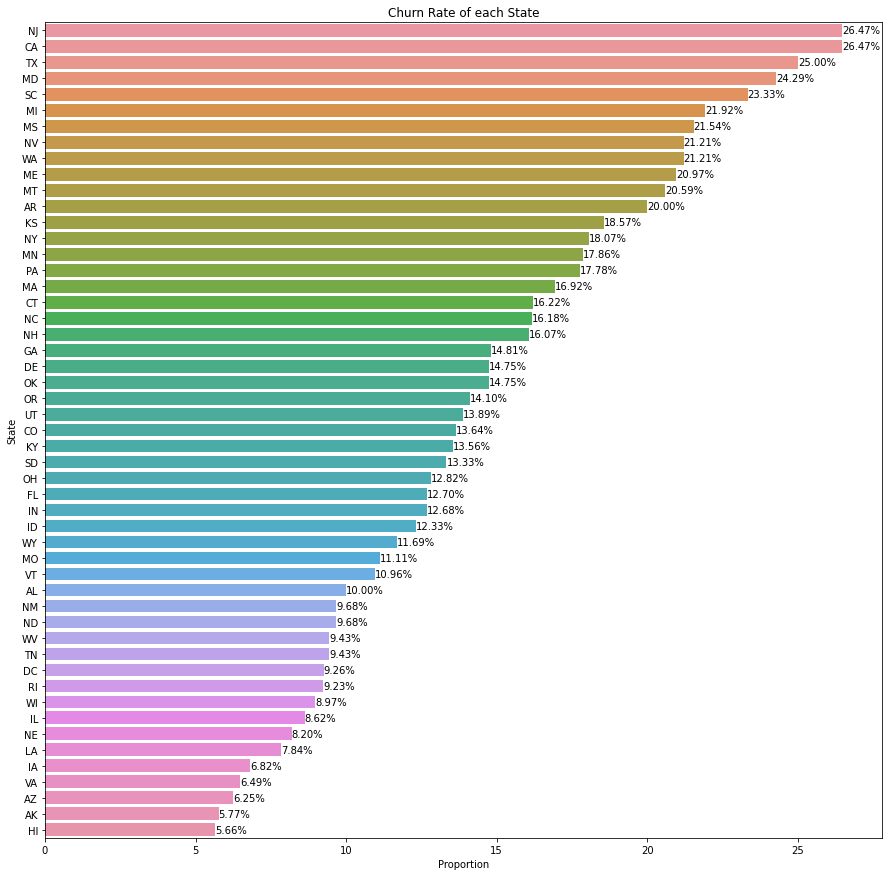

In [14]:
prop_state_churn = df.groupby('State', as_index=False)['Churn'].value_counts(normalize=True)
churn_rate = prop_state_churn[prop_state_churn['Churn']==True].sort_values(by='proportion', ascending=False)
churn_rate['percentage'] = churn_rate['proportion']*100
print('Average Churn Rate: ', round(churn_rate['percentage'].mean(), 3), '%')

fig, axs = plt.subplots(figsize=(15,15))
sns.barplot(y='State', x='percentage', data=churn_rate, ax=axs).set(title='Churn Rate of each State', xlabel='Proportion')
axs.bar_label(container=axs.containers[0], fmt='%.2f%%');

Both New Jersey and California received the highest customer churn rate at approximately 26.47%. On the other hand, Hawaii has the lowest at 5.66%. 

## Describing each State in terms of Account Length

Coefficient of Skewness: 0.097
Average Account Length: 101.065 days


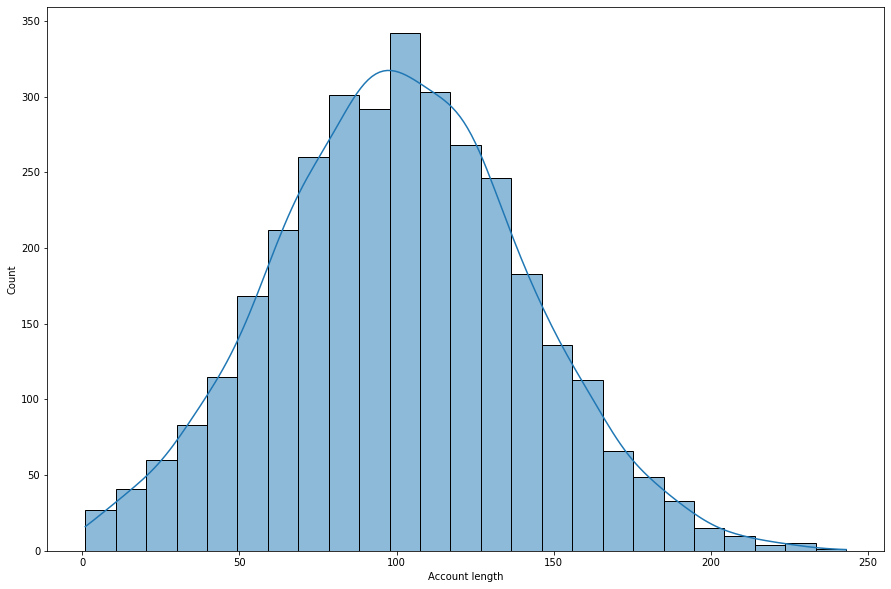

In [15]:
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(x='Account length', bins=25, kde=True, data=df)
print('Coefficient of Skewness:', round(skew(df['Account length']), 3))
print('Average Account Length:', round(df['Account length'].mean(), 3), 'days')

The account length is approximately normally distributed with a coefficeint of 0.0966. The normal distribution is a symmetrical continuous probability distribution around its mean, with the majority of observations clustering around the center peak with values farther away from the mean tapering off equally in both directions. Therefore, the attribute will be represented by the mean.

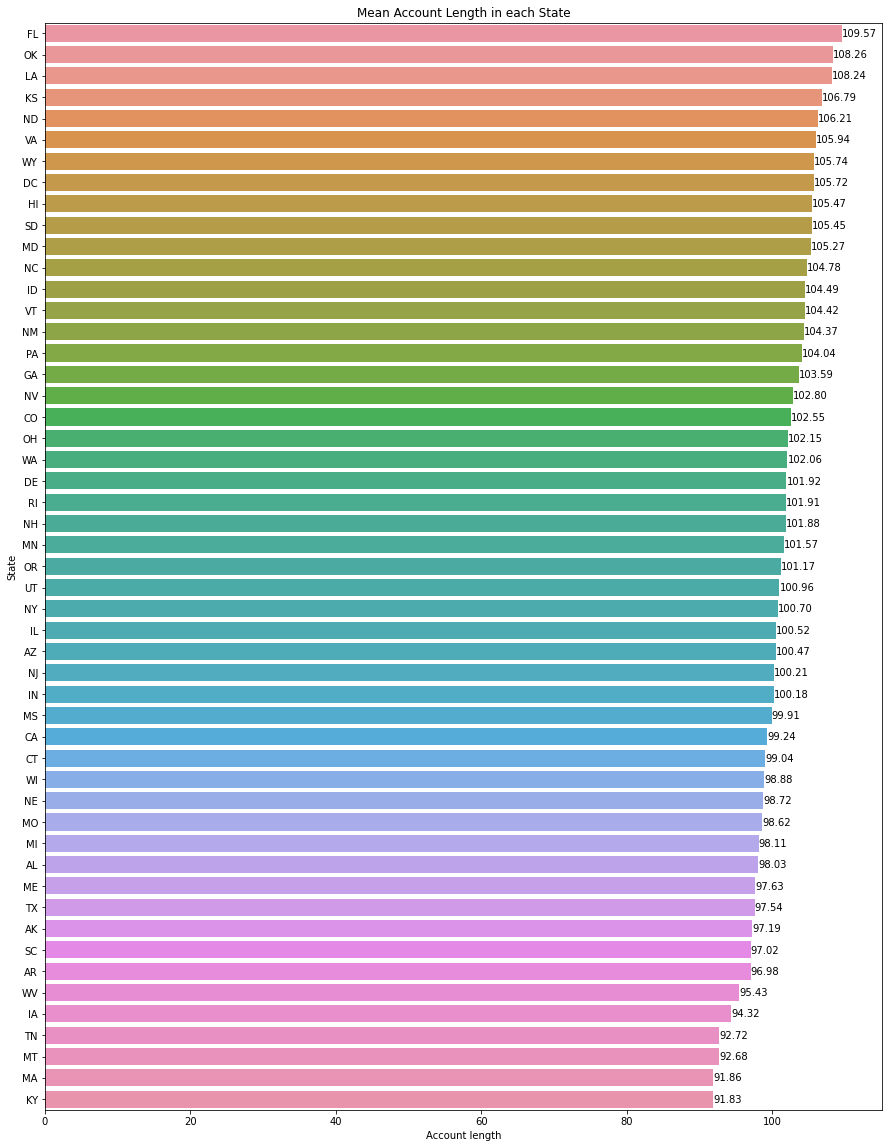

In [16]:
mean_accntlength = df.groupby('State', as_index=False)['Account length'].mean().sort_values(by='Account length', ascending=False)

fig, axs = plt.subplots(figsize=(15,20))
sns.barplot(y='State', x='Account length', data=mean_accntlength).set(title='Mean Account Length in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

Intuitively, one may assume that if a state has a low churn rate, then it must have customers with longer account lengths than those states with high churn rates. From the initial findings, Hawaii, having the lowest churn rate, has an account length of 105 days which is larger than the national mean. On the other end, California and New Jersey account lengths below the national mean as both are at the top in terms of churn rate.

Interestingly, Kentucky has a relatively low churn rate despite having the lowest mean account length. If anything, the state must be somewhere at the top of the churn rate ranking. Similarly, this logic can be interpreted with Florida and Oklahoma. 

## Describing each State in terms of Service Plans
The telecommunications company offers two additional types of services: international calls and voicemail. 

### International Plan
In essence, the international plan serves to bridge the distance with people in other countries. These calls are processed by international gateway exchanges (also known as switches). Generally, many companies charge higher for this service since it takes more effort for networks to process and connect customer calls at a global level. 

In [17]:
print('There are %d unique values within the International Plan Attribute' %(df['International plan'].nunique()))
df['International plan'].unique()

There are 2 unique values within the International Plan Attribute


array(['No', 'Yes'], dtype=object)

Missing Value: IA


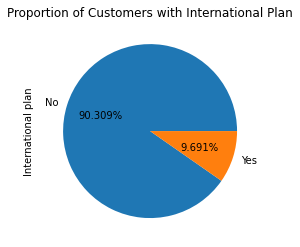

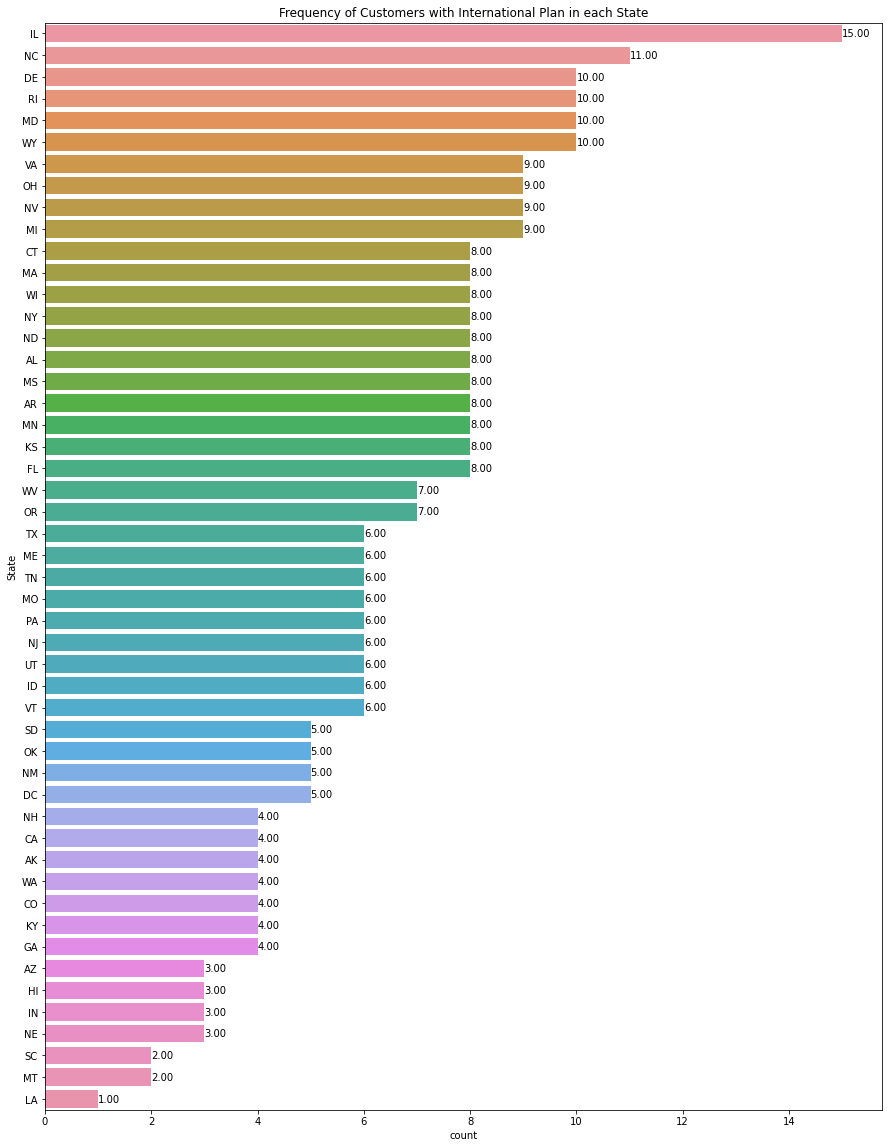

In [18]:
df['International plan'].value_counts().plot(kind='pie', y='count', autopct='%.3f%%').set(title='Proportion of Customers with International Plan')

freq_state_intlplan = df.groupby('International plan', as_index=False)['State'].value_counts()
only_intlplan = freq_state_intlplan[freq_state_intlplan['International plan']=='Yes']

fig, axs = plt.subplots(figsize=(15,20))
sns.barplot(y='State', x='count', data=only_intlplan).set(title='Frequency of Customers with International Plan in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

for state in df['State'].unique():
    if state not in only_intlplan['State'].unique():
        print('Missing Value:', state)

The dataset is mainly comprised of customers **without** International Plans at 90%.  Among the general minority, Illinois has the most customers using the particular plan. Also, not shown in the bar plot, Iowa is the only state that do not have any customers using an international plan.

### Voicemail Plan
The second plan involves the use of voicemails. This technology allows the user to store spoken messages, for later playback, when unavailable. The main advantage of this system is to ensure that people are always reachable. A customer may express their concerns immediately without feeling any time wasted by being placed on hold. As soon as the other end are available, the recipient can then return the call.

In [19]:
print('There are %d unique values within the Voicemail Plan Attribute' %(df['Voice mail plan'].nunique()))
df['Voice mail plan'].unique()

There are 2 unique values within the Voicemail Plan Attribute


array(['Yes', 'No'], dtype=object)

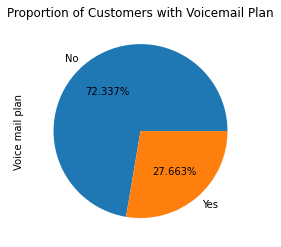

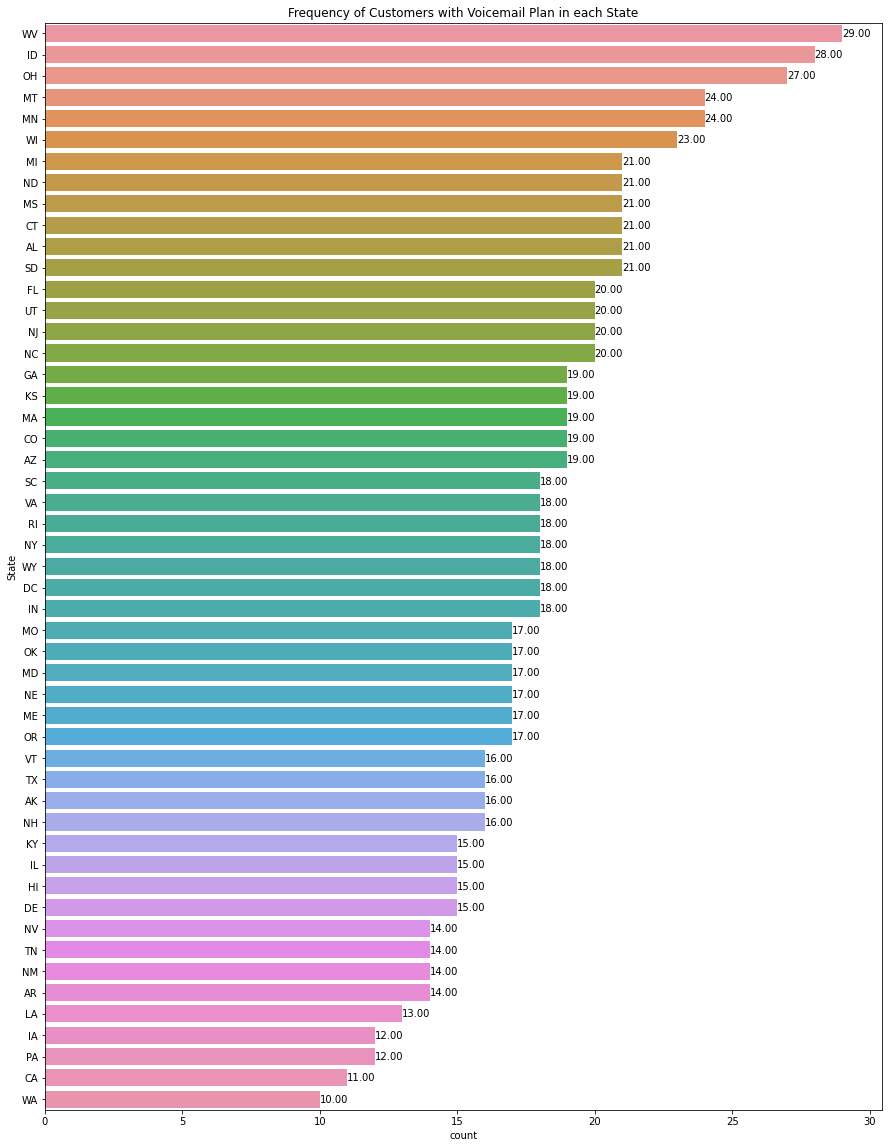

In [20]:
df['Voice mail plan'].value_counts().plot(kind='pie', y='count', autopct='%.3f%%').set(title='Proportion of Customers with Voicemail Plan')

freq_state_vmplan = df.groupby('Voice mail plan', as_index=False)['State'].value_counts(dropna=False)
only_vmplan = freq_state_vmplan[freq_state_vmplan['Voice mail plan']=='Yes']

fig, axs = plt.subplots(figsize=(15,20))
sns.barplot(y='State', x='count', data=only_vmplan).set(title='Frequency of Customers with Voicemail Plan in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

for state in df['State'].unique():
    if state not in only_vmplan['State'].unique():
        print('Missing Value:', state)

The data shows that 72% of the customers **do not have** voicemail installed from the company. However, among the minority, West Virginia has the most customers using this system and Washington has the lowest number.

## Describing each State in terms of Minutes per Call

Median Minutes per Call during the Day: 1.791
Median Minutes per Call during the Evening: 1.81
Median Minutes per Call during the Night: 1.795
Median Minutes per International Call: 43.38


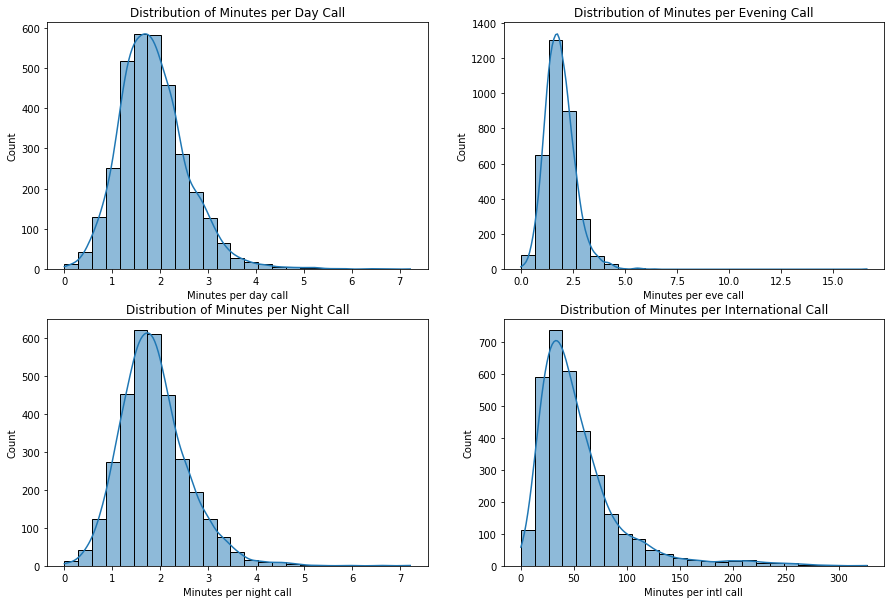

In [21]:
df['Minutes per day call'] = df['Total day minutes']/df['Total day calls']
df['Minutes per day call'].fillna(0, inplace=True)
df['Minutes per eve call'] = df['Total day minutes']/df['Total eve calls']
df['Minutes per eve call'].fillna(0, inplace=True)
df['Minutes per night call'] = df['Total day minutes']/df['Total night calls']
df['Minutes per night call'].fillna(0, inplace=True)
df['Minutes per intl call'] = df['Total day minutes']/df['Total intl calls']
df['Minutes per intl call'].fillna(0, inplace=True)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.histplot(x='Minutes per day call', bins=25, kde=True, data=df, ax=axs[0,0]).set(title='Distribution of Minutes per Day Call')
sns.histplot(x='Minutes per eve call', bins=25, kde=True, data=df, ax=axs[0,1]).set(title='Distribution of Minutes per Evening Call')
sns.histplot(x='Minutes per night call', bins=25, kde=True, data=df, ax=axs[1,0]).set(title='Distribution of Minutes per Night Call')
sns.histplot(x='Minutes per intl call', bins=25, kde=True, data=df, ax=axs[1,1]).set(title='Distribution of Minutes per International Call')

print('Median Minutes per Call during the Day:', round(df['Minutes per day call'].median(),3))
print('Median Minutes per Call during the Evening:', round(df['Minutes per eve call'].median(),3))
print('Median Minutes per Call during the Night:', round(df['Minutes per night call'].median(),3))
print('Median Minutes per International Call:', round(df['Minutes per intl call'].median(),3))

The general distribution of the call frequencies at each time of the day is approximately normal. This means that these features will be represented by their means.

### Day Calls

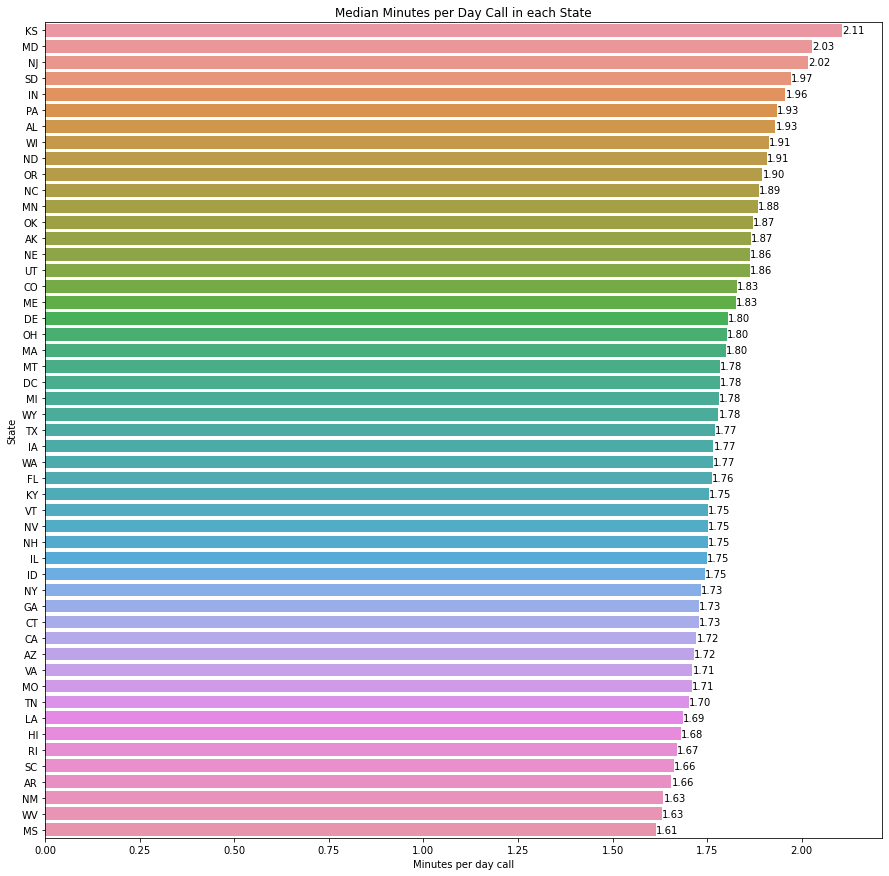

In [22]:
only_daycalls = df.groupby('State', as_index=False)['Minutes per day call'].median().sort_values(by='Minutes per day call', ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.barplot(x='Minutes per day call', y='State', data=only_daycalls).set(title='Median Minutes per Day Call in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

Kansas customers have the most minutes per day call by around 2.11 minutes

### Evening Calls

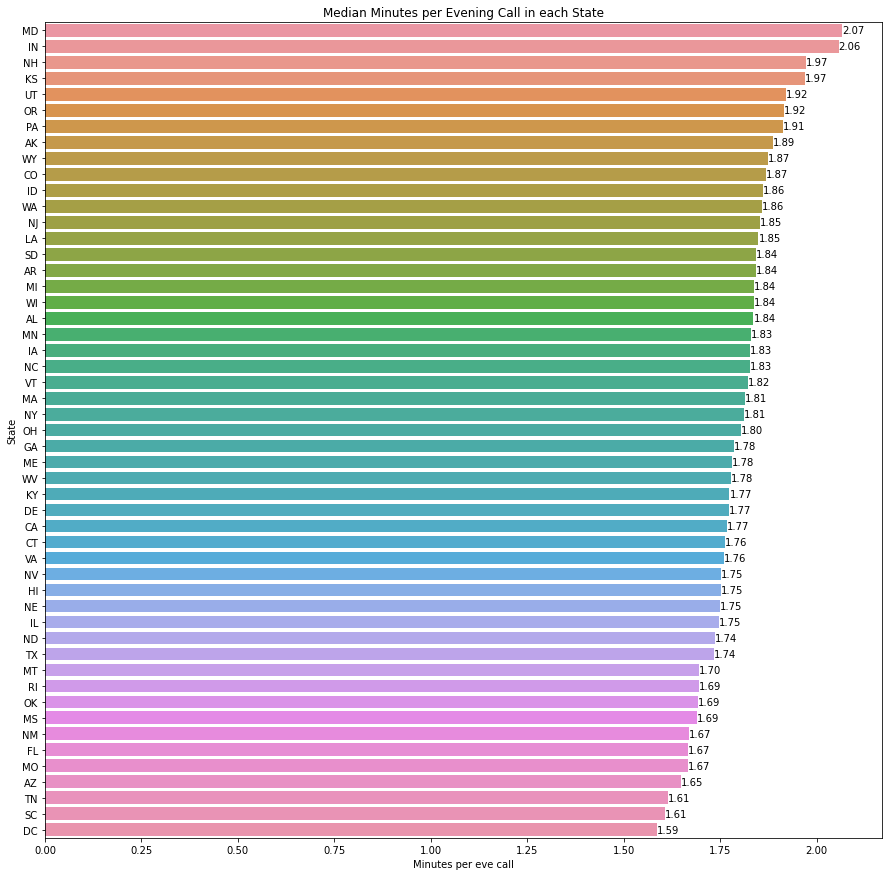

In [23]:
only_evecalls = df.groupby('State', as_index=False)['Minutes per eve call'].median().sort_values(by='Minutes per eve call', ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.barplot(x='Minutes per eve call', y='State', data=only_evecalls).set(title='Median Minutes per Evening Call in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

Maryland customers have the longest call duration during the evening at 2.07 minutes.

### Night Calls

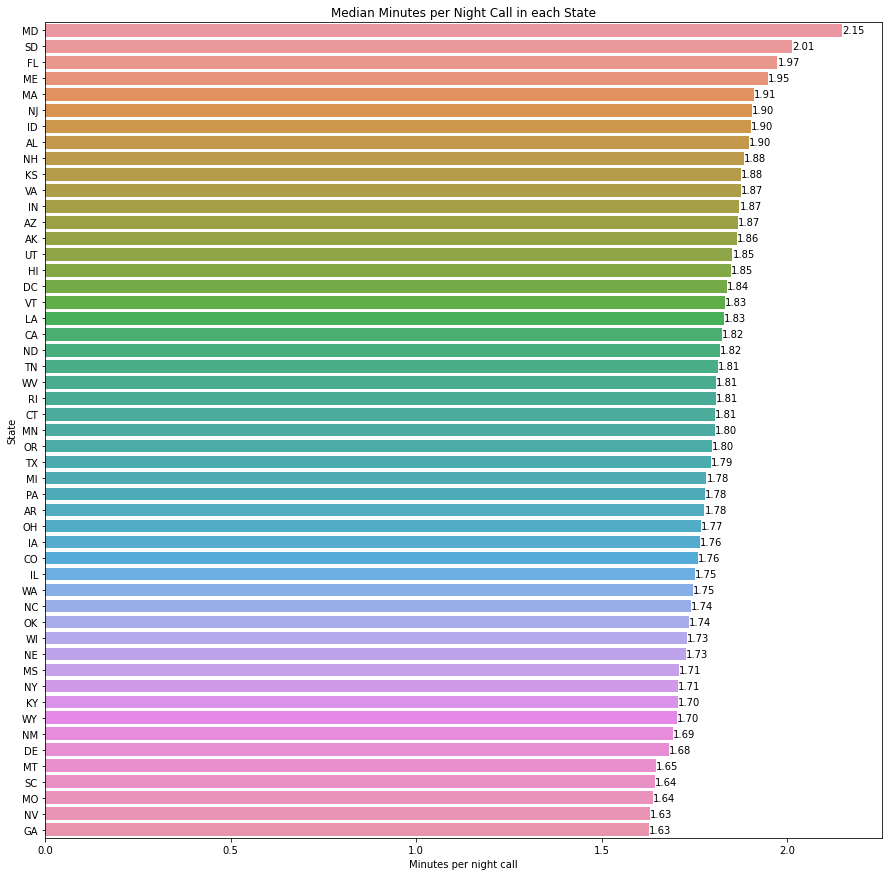

In [24]:
only_nightcalls = df.groupby('State', as_index=False)['Minutes per night call'].median().sort_values(by='Minutes per night call', ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.barplot(x='Minutes per night call', y='State', data=only_nightcalls).set(title='Median Minutes per Night Call in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

Maryland customers has the longest minutes per call during the night at 2.15 minutes.

### International Calls

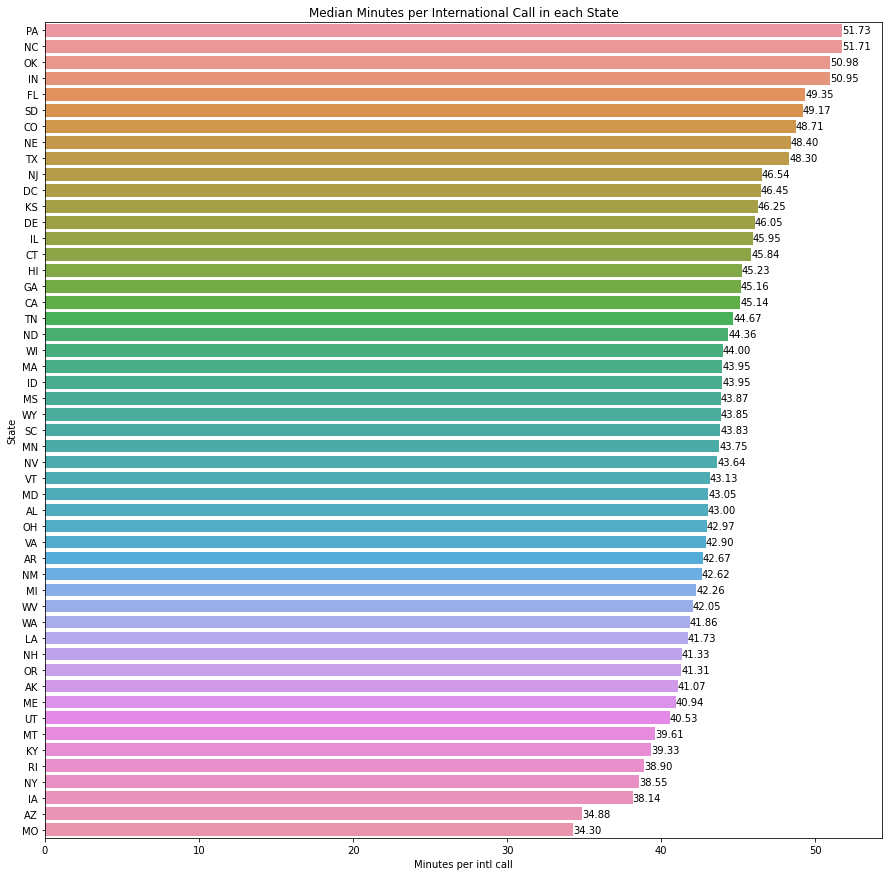

In [25]:
only_intlcalls = df.groupby('State', as_index=False)['Minutes per intl call'].median().sort_values(by='Minutes per intl call', ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.barplot(x='Minutes per intl call', y='State', data=only_intlcalls).set(title='Median Minutes per International Call in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

Pennsylvania has the longest median minutes per international call. 

# Understanding Charges for each Call Type
The company has indicated four various types of calls:
1. Day Calls
2. Evening Calls
3. Night Calls
4. International Calls*

Evidently, three of these are based on the time of day while the fourth is related to the service plan.

Before eventually going into the analysis, one must question as to *what is the appropriate measure of the charges for each customer*. The dataset provides three general features that can possibly aid the analysis: total charge, total minutes, and total calls. The easiest approach would be simply using the total charge of each customer. However, by doing so does not encapture how exactly the company "treats" their customers. The second approach applies feature engineering - the concept of creating new features from existing ones. 

The main attribute contributing to attrition is cost. Thus, intuitively, *cost per call* or *cost per minute* can be created for further exploration. But, which one should be implemented? The purpose of engineered features must not only give new information, but should also be concise and relevant. In essence, the idea of a *cost per call* is illogical since a single price is attached regardless of an ambiguous call duration. If this were the case, then the company is liable to equally charge a hang-up (0 minutes) and a 5-minute phone call. This does not make sense.

Therefore, *cost per minute* will be created for accurate measure.


## Day, Evening, and Night Calls

Charge per Day Minute Skewness: -40.783
Charge per Evening Minute Skewness: -57.695
Charge per Night Minute Skewness: -0.301


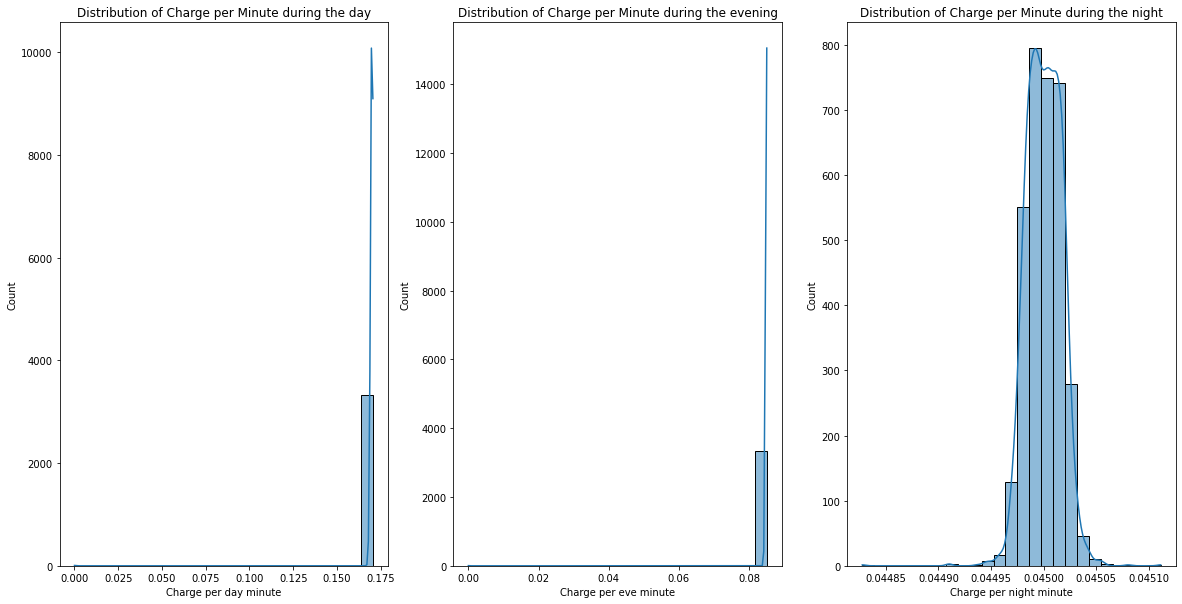

In [26]:
df['Charge per day minute'] = df['Total day charge']/df['Total day minutes']
df['Charge per day minute'].fillna(0, inplace=True)
df['Charge per eve minute'] = df['Total eve charge']/df['Total eve minutes']
df['Charge per eve minute'].fillna(0, inplace=True)
df['Charge per night minute'] = df['Total night charge']/df['Total night minutes']
df['Charge per night minute'].fillna(0, inplace=True)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.histplot(x='Charge per day minute', bins=25, kde=True, data=df, ax=axs[0]).set(title='Distribution of Charge per Minute during the day')
sns.histplot(x='Charge per eve minute', bins=25, kde=True, data=df, ax=axs[1]).set(title='Distribution of Charge per Minute during the evening')
sns.histplot(x='Charge per night minute', bins=25, kde=True, data=df, ax=axs[2]).set(title='Distribution of Charge per Minute during the night')

print('Charge per Day Minute Skewness:', round(skew(df['Charge per day minute']), 3))
print('Charge per Evening Minute Skewness:', round(skew(df['Charge per eve minute']), 3))
print('Charge per Night Minute Skewness:', round(skew(df['Charge per night minute']), 3))

As observed, the three histograms exhibit forms of left-skewed distribution. The unusual shape and skewness coefficient of the first two plots are due to the influence of having customers not making any calls during the day and evening; thus, these individuals were not charged. But by removing the specific outliers, the plots will approximate normality.

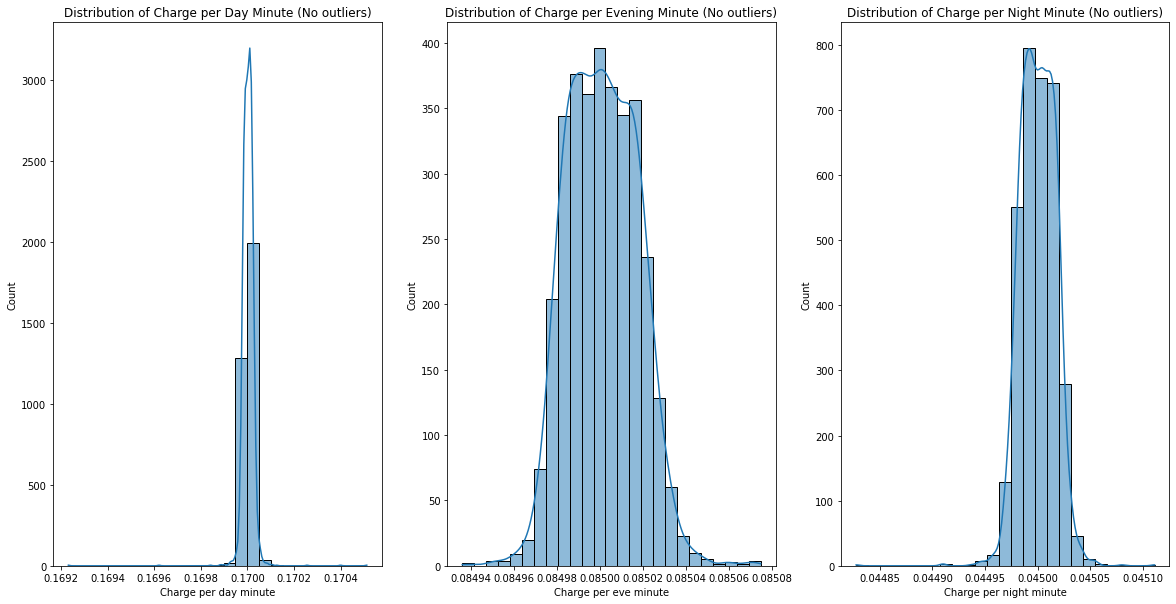

In [27]:
df['Charge per day minute'] = df['Total day charge']/df['Total day minutes']
df['Charge per eve minute'] = df['Total eve charge']/df['Total eve minutes']
df['Charge per night minute'] = df['Total night charge']/df['Total night minutes']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.histplot(x='Charge per day minute', bins=25, kde=True, data=df, ax=axs[0]).set(title='Distribution of Charge per Day Minute (No outliers)')
sns.histplot(x='Charge per eve minute', bins=25, kde=True, data=df, ax=axs[1]).set(title='Distribution of Charge per Evening Minute (No outliers)')
sns.histplot(x='Charge per night minute', bins=25, kde=True, data=df, ax=axs[2]).set(title='Distribution of Charge per Night Minute (No outliers)');

In [28]:
df[['Charge per day minute', 'Charge per eve minute', 'Charge per night minute']].median()

Charge per day minute      0.170004
Charge per eve minute      0.085000
Charge per night minute    0.045000
dtype: float64

The company has structured a varying charge per minute depending on when the call is made during the day. Day charge is most costly at $0.17 per minute, evening charge is around \\$0.085, and night charge is the cheapest at \\$0.045 per minute.

In [29]:
df['Charge per day minute'].fillna(0, inplace=True)
df['Charge per eve minute'].fillna(0, inplace=True)
df['Charge per night minute'].fillna(0, inplace=True)

## International Calls

The limitation of the dataset is that it does not account *when* and *where* these international calls were made; thus, interpretations will be made on a general level.

Charge per International Minute Skewness: -13.491


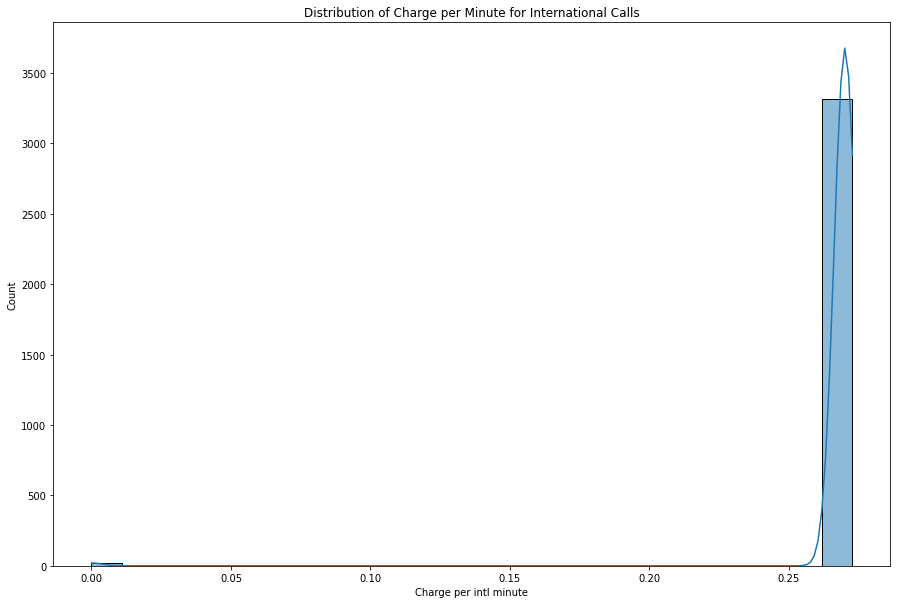

In [30]:
df['Charge per intl minute'] = df['Total intl charge']/df['Total intl minutes']
df['Charge per intl minute'].fillna(0, inplace=True)

fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(x='Charge per intl minute', bins=25, kde=True, data=df).set(title='Distribution of Charge per Minute for International Calls')

print('Charge per International Minute Skewness:', round(skew(df['Charge per intl minute']), 3))

In [31]:
df[['Charge per intl minute']].median()

Charge per intl minute    0.27
dtype: float64

The general distribution of the Charge per International Call also depicts a left-skewed distribution. Similar to the previous section, the unusual shape and coefficient can be attributed to the presence of customers with zero international calls. Since the plan is achieved solely through the willingness of the customers, the general shape of the distribution also accounts those without the plan.

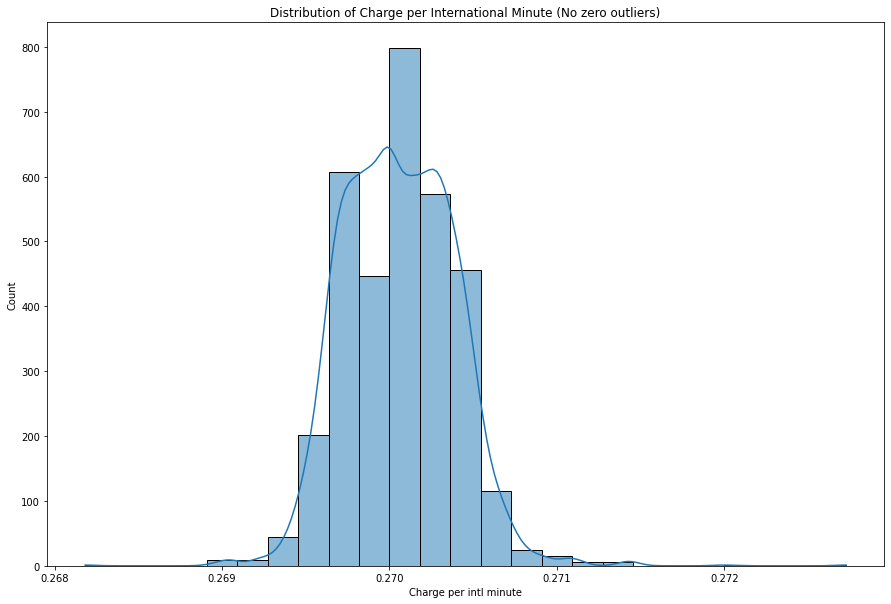

In [32]:
df['Charge per intl minute'] = df['Total intl charge']/df['Total intl minutes']

fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(x='Charge per intl minute', bins=25, kde=True, data=df).set(title='Distribution of Charge per International Minute (No zero outliers)');

In [33]:
df['Charge per intl minute'].fillna(0, inplace=True)

# Understanding Customer Churn in terms of Account Length

In [34]:
print('Mean Account Length:', round(df['Account length'].mean(), 3), 'days')

Mean Account Length: 101.065 days


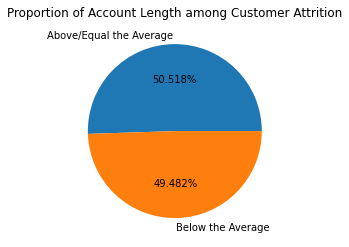

In [35]:
df['Position of accnt length'] = df['Account length'].apply(lambda x: 'Above/Equal' if x >= df['Account length'].mean() else 'Below')

prop_churn_accntlength = df.groupby('Churn', as_index=False)['Position of accnt length'].value_counts()
only_churn_accntlength = prop_churn_accntlength[prop_churn_accntlength['Churn']==True]

plt.pie(only_churn_accntlength['count'], labels=only_churn_accntlength['Position of accnt length'] + ' the Average', autopct='%.3f%%');
plt.title('Proportion of Account Length among Customer Attrition');

Among those who have discontinued from the company, half have accounts more than or equal to the average of 101 days.

# Understanding Customer Churn in terms of International Plan

## No International Plan

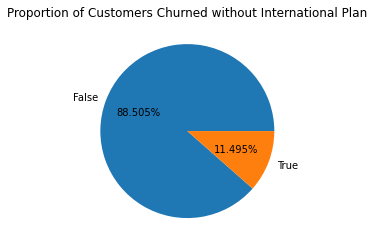

In [36]:
intlplan_churn = df.groupby('International plan', as_index=False)['Churn'].value_counts()
no_intlplan_churn = intlplan_churn[intlplan_churn['International plan']=='No']

plt.pie(no_intlplan_churn['count'], labels=no_intlplan_churn['Churn'], autopct='%.3f%%');
plt.title('Proportion of Customers Churned without International Plan');

Missing Value: IL


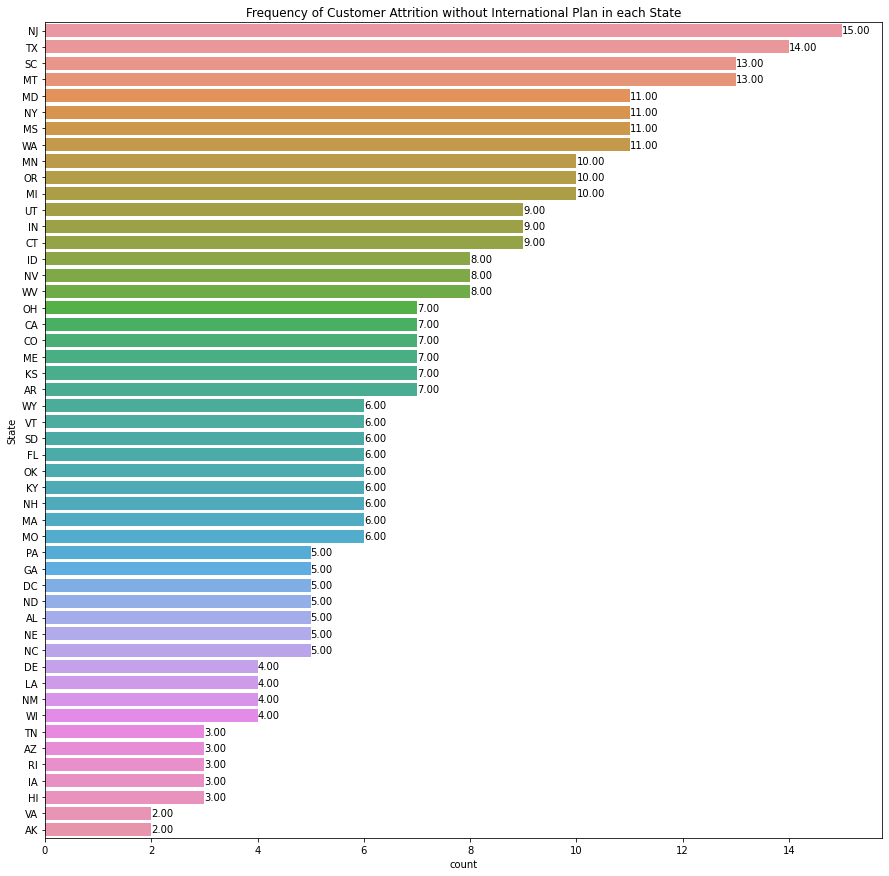

In [37]:
intlplan_churn_state = df.groupby('International plan', as_index=False)['Churn', 'State'].value_counts()
no_intlplan_churn_state = intlplan_churn_state[intlplan_churn_state['International plan']=='No'][intlplan_churn_state['Churn']==True].reset_index()

fig, axs = plt.subplots(figsize=(15,15))
sns.barplot(y='State', x='count', data=no_intlplan_churn_state).set(title='Frequency of Customer Attrition without International Plan in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

for state in df['State'].unique():
    if state not in no_intlplan_churn_state['State'].unique():
        print('Missing Value:', state)

Within those who have no international plan, about 11.50% have already churned. New Jersey has the most number of churned customer with 15. On the other hand, no customers from Illinois have discontinued.

## With International Plan

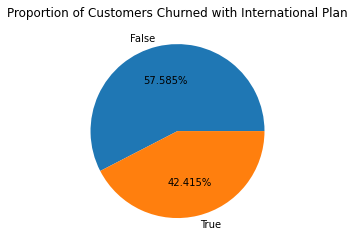

In [38]:
intlplan_churn = df.groupby('International plan', as_index=False)['Churn'].value_counts()
only_intlplan_churn = intlplan_churn[intlplan_churn['International plan']=='Yes']
plt.pie(only_intlplan_churn['count'], labels=only_intlplan_churn['Churn'], autopct='%.3f%%');
plt.title('Proportion of Customers Churned with International Plan');

Missing Value: IA
Missing Value: NE
Missing Value: LA
Missing Value: IN
Missing Value: DC
Missing Value: HI


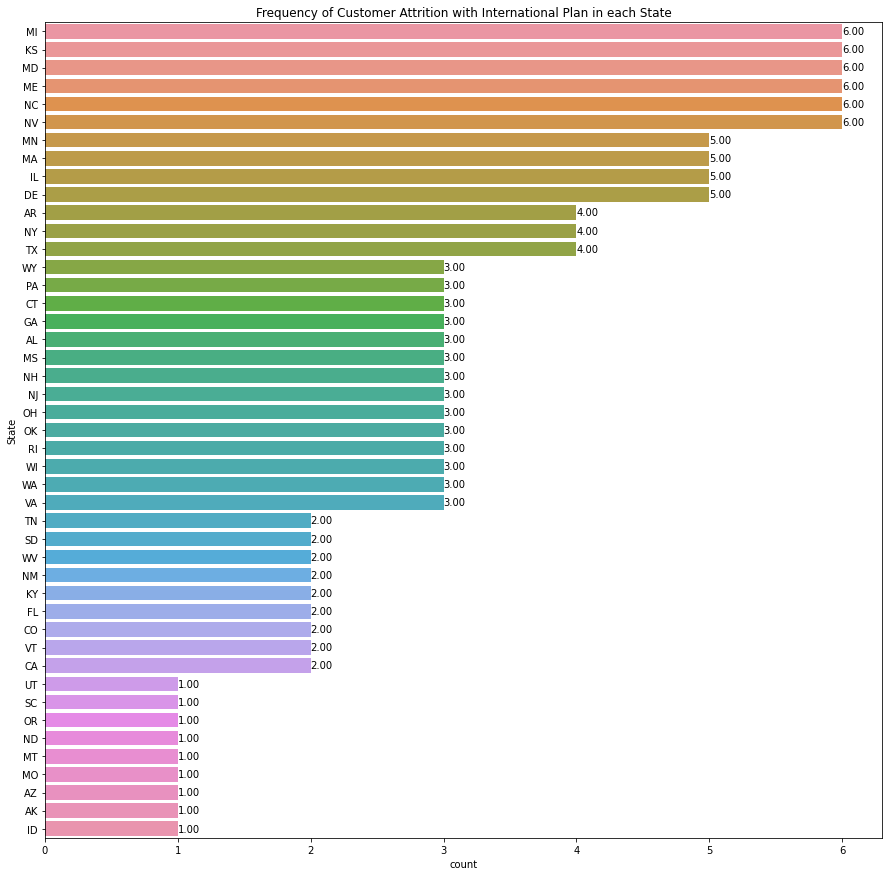

In [39]:
intlplan_churn_state = df.groupby('International plan', as_index=False)['Churn', 'State'].value_counts()
only_intlplan_churn_state = intlplan_churn_state[intlplan_churn_state['International plan']=='Yes'][intlplan_churn_state['Churn']==True].reset_index()

fig, axs = plt.subplots(figsize=(15,15))
sns.barplot(y='State', x='count', data=only_intlplan_churn_state).set(title='Frequency of Customer Attrition with International Plan in each State')
axs.bar_label(container=axs.containers[0], fmt='%.2f');

for state in df['State'].unique():
    if state not in only_intlplan_churn_state['State'].unique():
        print('Missing Value:', state)

Generally, customers with the international plan are in the minority. 42% of customers in this group have already discontinued from the service, higher than those without the plan. In terms of demographics, Michigan, Kansas, Maryland, Maine, North Carolina, and Nevada tied at the top with customers leaving despite having the plan. On the other hand, Iowa, Nebraska, Louisiana, Indiana, District of Columbia, and Hawaii have no recorded customer attrition in this category.

## Difference in Charges between Customers with and without International Plan

In [40]:
df.groupby('International plan', as_index=False)['Charge per intl minute'].median()

,International plan,Charge per intl minute
0,No,0.27
1,Yes,0.27


In essence, there is no significant difference in charges between those who have and do not have the international plan. Even without an international plan, the cost per minute remains at $0.27.

# Understanding Customer Churn in terms of Minutes per Call

In [41]:
print('Median Minutes per Call during the Day:', round(df['Minutes per day call'].median(),3))
print('Median Minutes per Call during the Evening:', round(df['Minutes per eve call'].median(),3))
print('Median Minutes per Call during the Night:', round(df['Minutes per night call'].median(),3))
print('Median Minutes per International Call:', round(df['Minutes per intl call'].median(),3))

Median Minutes per Call during the Day: 1.791
Median Minutes per Call during the Evening: 1.81
Median Minutes per Call during the Night: 1.795
Median Minutes per International Call: 43.38


## Day Calls

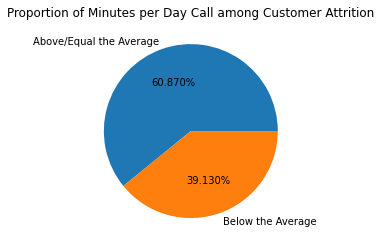

In [42]:
df['Position of day call duration'] = df['Minutes per day call'].apply(lambda x: 'Above/Equal' if x >= df['Minutes per day call'].median() else 'Below')

prop_churn_daycallduration = df.groupby('Churn', as_index=False)['Position of day call duration'].value_counts()
only_churn_daycallduration = prop_churn_daycallduration[prop_churn_daycallduration['Churn']==True]
plt.pie(only_churn_daycallduration['count'], labels=only_churn_daycallduration['Position of day call duration'] + ' the Average', autopct='%.3f%%');
plt.title('Proportion of Minutes per Day Call among Customer Attrition');

In terms of day calls, about 61% of the customer churns have call durations more than the median 1.791 minutes per call

## Evening Calls

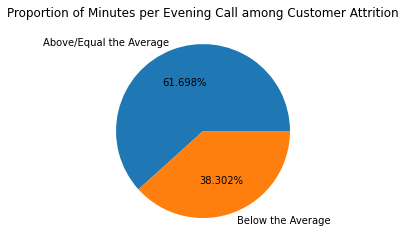

In [43]:
df['Position of eve call duration'] = df['Minutes per eve call'].apply(lambda x: 'Above/Equal' if x >= df['Minutes per eve call'].median() else 'Below')

prop_churn_evecallduration = df.groupby('Churn', as_index=False)['Position of eve call duration'].value_counts()
only_churn_evecallduration = prop_churn_evecallduration[prop_churn_evecallduration['Churn']==True]
plt.pie(only_churn_evecallduration['count'], labels=only_churn_evecallduration['Position of eve call duration'] + ' the Average', autopct='%.3f%%');
plt.title('Proportion of Minutes per Evening Call among Customer Attrition');

In terms of evening calls, about 62% of the customer churns have taken more than the median 1.81 minutes per call

## Night Calls

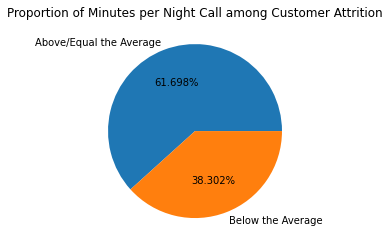

In [44]:
df['Position of night call duration'] = df['Minutes per night call'].apply(lambda x: 'Above/Equal' if x >= df['Minutes per night call'].median() else 'Below')

prop_churn_nightcallduration = df.groupby('Churn', as_index=False)['Position of night call duration'].value_counts()
only_churn_nightcallduration = prop_churn_nightcallduration[prop_churn_nightcallduration['Churn']==True]
plt.pie(only_churn_nightcallduration['count'], labels=only_churn_nightcallduration['Position of night call duration'] + ' the Average', autopct='%.3f%%');
plt.title('Proportion of Minutes per Night Call among Customer Attrition');

Similar to evening calls, about 62% of those who discontinued have call lengths more than 1.795 minutes per call.

## International Calls

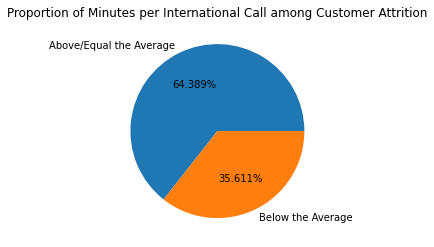

In [45]:
df['Position of intl call duration'] = df['Minutes per intl call'].apply(lambda x: 'Above/Equal' if x >= df['Minutes per intl call'].median() else 'Below')

prop_churn_intlcallduration = df.groupby('Churn', as_index=False)['Position of intl call duration'].value_counts()
only_churn_intlcallduration = prop_churn_intlcallduration[prop_churn_intlcallduration['Churn']==True]
plt.pie(only_churn_intlcallduration['count'], labels=only_churn_intlcallduration['Position of intl call duration'] + ' the Average', autopct='%.3f%%');
plt.title('Proportion of Minutes per International Call among Customer Attrition');

Finally, for international calls, 64% of those who churned have call durations of more than 43 minutes.

# Understanding Customer Churn in terms of Voicemail Messages

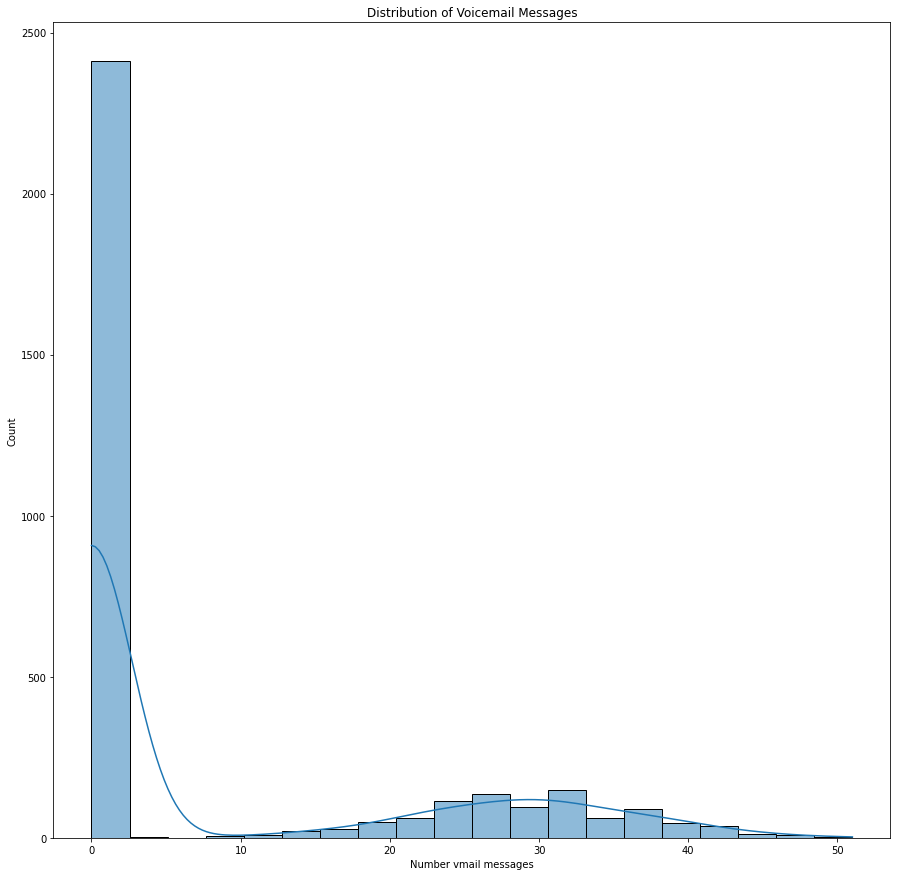

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.histplot(x='Number vmail messages', kde=True, data=df).set(title='Distribution of Voicemail Messages');

The shape of the histogram indicates a large amount of customers without any voicemail messages. However, if these outliers were to be removed, the distribution will approximate normality as shown below.

29.0

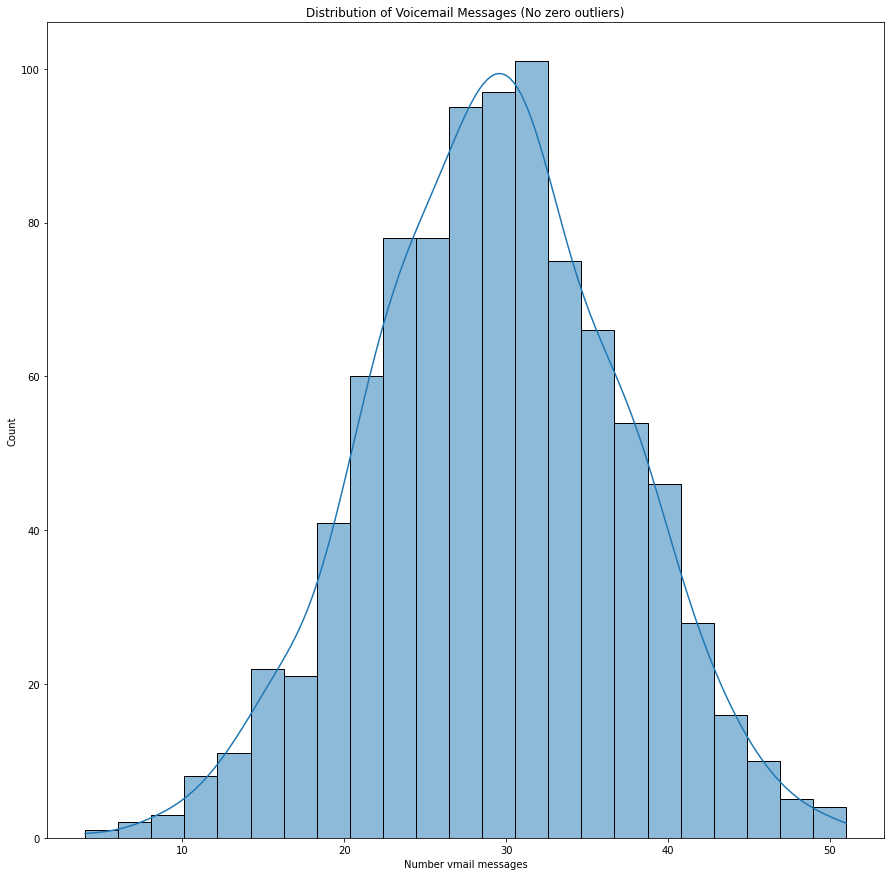

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
have_vmmsg = df[df['Number vmail messages']!=0].reset_index()
sns.histplot(x='Number vmail messages', kde=True,data=have_vmmsg).set(title='Distribution of Voicemail Messages (No zero outliers)');

have_vmmsg['Number vmail messages'].median()

If the zero outliers were to be temporarily discarded, the median number of voicemail messages is 29.

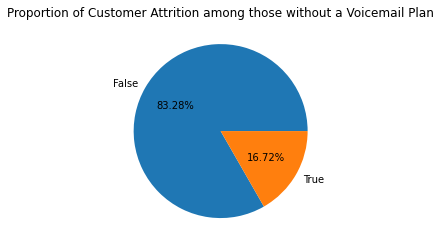

In [48]:
no_vmmsg = df[df['Number vmail messages']==0].reset_index().drop('index', axis=1)
no_vmmsg_churn = no_vmmsg.groupby('Churn', as_index=False)['Voice mail plan'].value_counts()

plt.pie(no_vmmsg_churn['count'], labels=no_vmmsg_churn['Churn'], autopct='%.2f%%')
plt.title('Proportion of Customer Attrition among those without a Voicemail Plan');

All the zero voicemail frequency displayed in the histograms correspond to customers who did not avail the voicemail plan. To be further specific, about 17% of the customers have churned from the company.

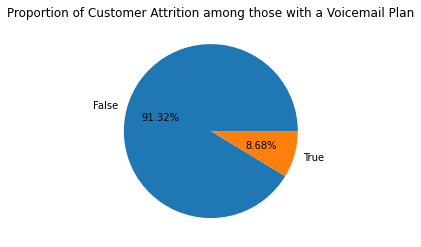

In [49]:
have_vmmsg = df[df['Number vmail messages']!=0].reset_index().drop('index', axis=1)
have_vmmsg_churn = have_vmmsg.groupby('Churn', as_index=False)['Voice mail plan'].value_counts()

plt.pie(have_vmmsg_churn['count'], labels=have_vmmsg_churn['Churn'], autopct='%.2f%%')
plt.title('Proportion of Customer Attrition among those with a Voicemail Plan');

On the other hand, only 9% of those with a voicemail plan has churned from the company.

# Understanding Customer Churn in terms of Customer Service Calls

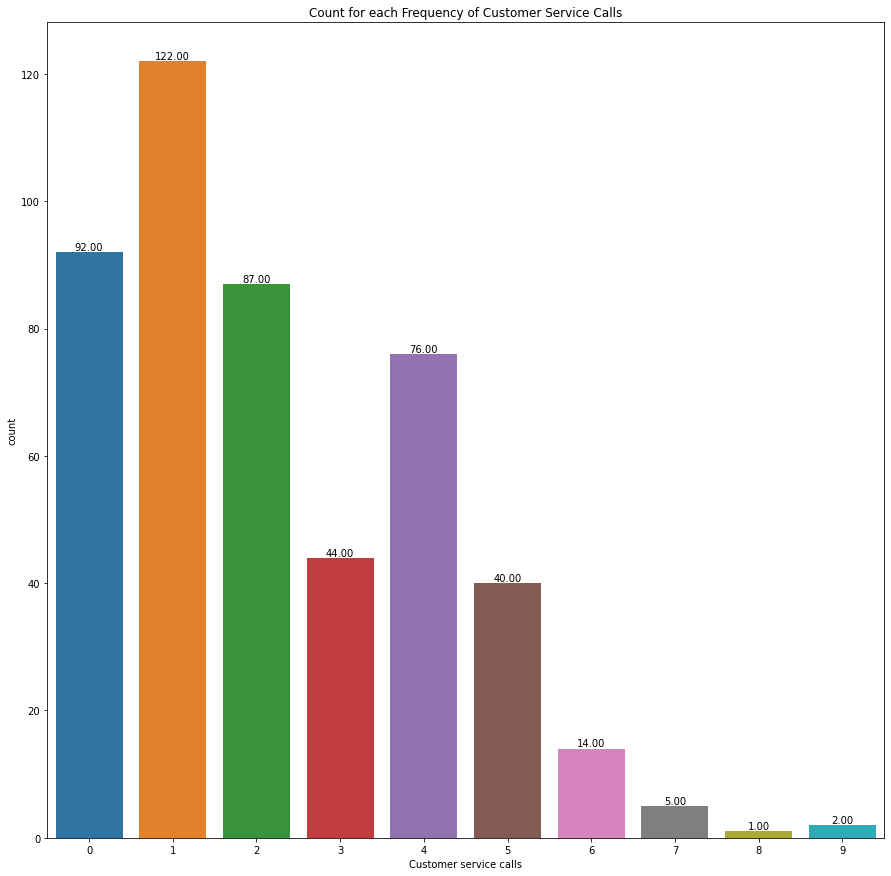

In [50]:
only_churn = df[df['Churn'] == True].reset_index()

fig, axs = plt.subplots(figsize=(15,15))
sns.countplot(x='Customer service calls', data=only_churn).set(title='Count for each Frequency of Customer Service Calls');
axs.bar_label(container=axs.containers[0], fmt='%.2f');

Generally, customers who have called once to customer service have already discontinued from using the service.

# Preprocessing

In [51]:
df.drop(['Area code', 'Position of accnt length','Position of day call duration',
        'Position of eve call duration', 'Position of night call duration', 'Position of intl call duration',
        'Charge per day minute','Charge per eve minute', 'Charge per night minute', 'Charge per intl minute'], axis=1, inplace=True)

In [52]:
numerics = df.select_dtypes(['int64', 'float64']).columns.to_list()
categories = df.select_dtypes(['object']).columns.to_list()

In [53]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

df.shape

(3314, 23)

In [55]:
numerics

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Minutes per day call',
 'Minutes per eve call',
 'Minutes per night call',
 'Minutes per intl call']

In [56]:
scaler = StandardScaler()

In [57]:
X_num_scaled = pd.DataFrame(scaler.fit_transform(df[numerics]), columns=numerics)
X_num_scaled

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Minutes per day call,Minutes per eve call,Minutes per night call,Minutes per intl call
0,0.675853,1.232062,1.567848,0.478847,1.568118,-0.072687,-0.059220,-0.072504,0.867386,-0.465021,0.866672,-0.108502,-0.614741,-0.109214,-0.427714,0.734060,1.057858,1.465688,0.837863
1,0.149136,1.305037,-0.334983,1.126459,-0.335258,-0.110234,0.142273,-0.109702,1.059095,0.147978,1.059914,1.264348,-0.614741,1.265079,-0.427714,-0.763575,-0.407129,-0.425176,-0.010070
2,0.901589,-0.592326,1.168897,0.678112,1.169058,-1.578528,0.494886,-1.579045,-0.755224,0.199061,-0.753925,0.707787,0.203104,0.701619,-1.187332,0.358466,0.443441,0.659969,-0.137547
3,-0.427745,-0.592326,2.198448,-1.463990,2.198612,-2.750396,-0.613325,-2.750800,-0.077325,-0.567188,-0.077579,-1.370039,1.020950,-1.373563,0.331903,3.202706,2.015047,2.099876,-0.282766
4,-0.653481,-0.592326,-0.241220,0.628296,-0.241171,-1.042986,1.099364,-1.041991,-0.274963,1.067477,-0.275212,-0.071398,-0.614741,-0.067985,1.091520,-0.543065,-0.674720,-0.694187,0.031712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0.324708,1.305037,-0.785412,-0.617112,-0.785147,-0.896749,1.250484,-0.897847,0.924701,-0.311771,0.923766,0.448059,1.020950,0.454246,0.331903,-0.430032,-1.030901,-0.580497,-0.852619
3310,0.124054,1.523964,-1.769001,1.524990,-1.769279,0.055764,1.552723,0.055366,0.566976,-1.384520,0.568025,-0.813479,-0.614741,-0.810103,-0.427714,-1.686674,-1.636838,-1.021200,-0.649092
3311,-1.029708,-0.592326,0.258847,0.877378,0.258466,-2.293901,0.494886,-2.292793,0.183558,1.731560,0.181541,1.078828,1.429872,1.072678,1.091520,-0.313539,-0.151090,-0.596667,-0.738289
3312,1.453388,-0.592326,-0.184227,0.678112,-0.183853,-0.066758,0.243020,-0.067854,-0.140569,-0.924771,-0.139065,0.485163,-0.205819,0.481732,-0.427714,-0.523593,-0.343434,0.280669,-0.290666


In [58]:
ohe = OneHotEncoder(handle_unknown='ignore')

X_cat_enc= ohe.fit_transform(df[categories])
X_ohe = pd.DataFrame(X_cat_enc.toarray())
labels = ohe.get_feature_names_out(categories)
X_ohe.columns = labels
X_ohe

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [63]:
df['Churn'].replace({True:1,
                    False:0}, inplace=True)
Y_enc = df['Churn'].to_frame().reset_index()

In [66]:
df_trans = pd.concat([X_ohe, X_num_scaled, Y_enc], axis=1)

df_trans

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Minutes per day call,Minutes per eve call,Minutes per night call,Minutes per intl call,index,Churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.108502,-0.614741,-0.109214,-0.427714,0.734060,1.057858,1.465688,0.837863,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.264348,-0.614741,1.265079,-0.427714,-0.763575,-0.407129,-0.425176,-0.010070,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707787,0.203104,0.701619,-1.187332,0.358466,0.443441,0.659969,-0.137547,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.370039,1.020950,-1.373563,0.331903,3.202706,2.015047,2.099876,-0.282766,3,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.071398,-0.614741,-0.067985,1.091520,-0.543065,-0.674720,-0.694187,0.031712,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.448059,1.020950,0.454246,0.331903,-0.430032,-1.030901,-0.580497,-0.852619,3328,0
3310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.813479,-0.614741,-0.810103,-0.427714,-1.686674,-1.636838,-1.021200,-0.649092,3329,0
3311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.078828,1.429872,1.072678,1.091520,-0.313539,-0.151090,-0.596667,-0.738289,3330,0
3312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.485163,-0.205819,0.481732,-0.427714,-0.523593,-0.343434,0.280669,-0.290666,3331,0


# Correlation

<AxesSubplot:>

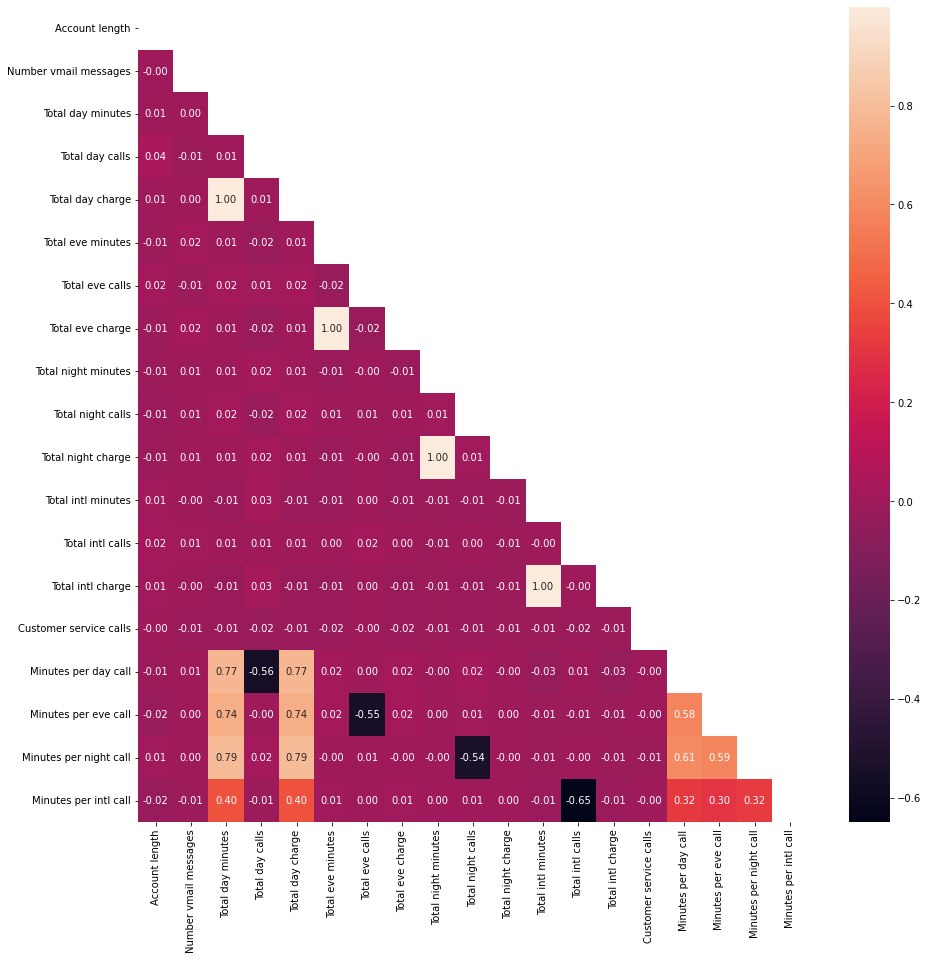

In [67]:
num_corr = df_trans[numerics].corr()
num_mask = np.triu(num_corr)

fig, axs = plt.subplots(figsize=(15,15))
sns.heatmap(num_corr, annot=True, fmt=".2f", mask=num_mask)

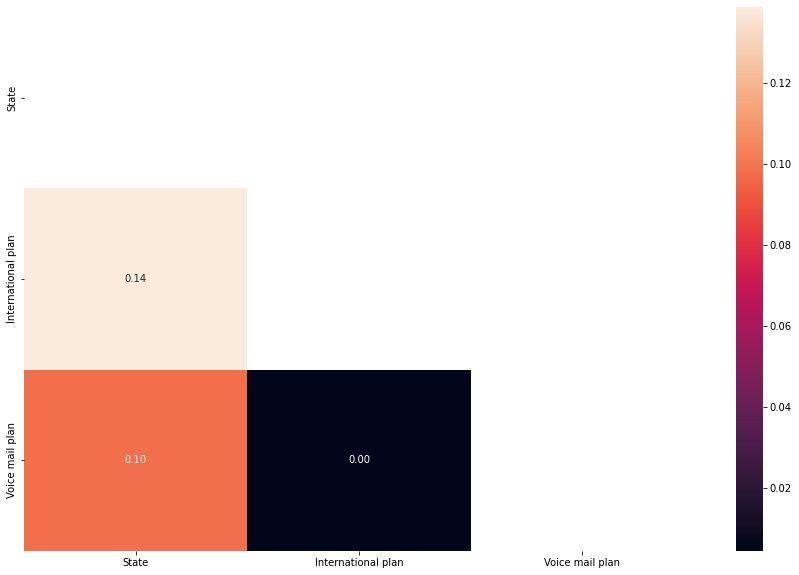

In [69]:
def cramer_v(x, y):
    cross = pd.crosstab(x, y, rownames=None, colnames=None).to_numpy()
    stat = chi2_contingency(cross)[0]
    obs = np.sum(cross)
    mini = min(cross.shape) - 1
    return np.sqrt(stat / (obs * mini))


rows = []
for var1 in categories:
    col = []
    for var2 in categories:
        corr = cramer_v(df[var1], df[var2])
        col.append(corr)
    rows.append(col)
corr_results = np.array(rows)
cat_corr = pd.DataFrame(corr_results, columns=categories, index=categories)
cat_mask = np.triu(cat_corr)

fig, axs = plt.subplots(figsize=(15,10))
sns.heatmap(cat_corr, annot=True, fmt=".2f", mask=cat_mask);

# Model Creation and Evaluation

## Eliminating Multicollinearity

In [70]:
df_trans.drop(['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], axis=1, inplace=True)

## Train and Test Sets

In [71]:
X = df_trans.drop(['Churn'], axis=1)
X = pd.get_dummies(X, columns=df_trans.select_dtypes(['object']).columns.to_list(), drop_first=True)

y = df_trans['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression (Base)

In [107]:
log_reg = LogisticRegression()

In [108]:
log_reg.fit(X_train, y_train)
y_test_predict = log_reg.predict(X_test)

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       551
           1       0.71      0.26      0.38       112

    accuracy                           0.86       663
   macro avg       0.79      0.62      0.65       663
weighted avg       0.84      0.86      0.83       663



In [109]:
accuracy_score(y_test, y_test_predict)

0.8567119155354449

At the most basic level of the logistic regression, the accuracy is at 86%. I think we can be better than this!

In [110]:
conf_mtx = pd.DataFrame(confusion_matrix(y_test, y_test_predict), 
                        index=['Positive', 'Negative'],
                        columns=['Positive', 'Negative'])
conf_mtx

,Positive,Negative
Positive,539,12
Negative,83,29


## Logistic Regression with RFE

In [128]:
rfe = RFE(log_reg, n_features_to_select=16)
rfe.fit(X_train, y_train)
rfe_rank = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feat_in_support = X_train.columns[rfe.support_]
print(feat_in_support)

Index(['State_AZ', 'State_CA', 'State_HI', 'State_ND', 'State_NJ', 'State_NV',
       'State_RI', 'State_SC', 'State_VA', 'State_VT', 'State_WI',
       'International plan_No', 'International plan_Yes', 'Voice mail plan_No',
       'Total day charge', 'Customer service calls'],
      dtype='object')


In [129]:
log_reg.fit(X_train[feat_in_support], y_train)
y_test_predict = log_reg.predict(X_test[feat_in_support])

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       551
           1       0.58      0.17      0.26       112

    accuracy                           0.84       663
   macro avg       0.71      0.57      0.59       663
weighted avg       0.81      0.84      0.80       663



If we try to follow Pareto's Principle with only 16 features to include, accuracy decreases to 84%.

In [113]:
conf_mtx = pd.DataFrame(confusion_matrix(y_test, y_test_predict), 
                        index=['Positive', 'Negative'],
                        columns=['Positive', 'Negative'])
conf_mtx

,Positive,Negative
Positive,536,15
Negative,93,19


## Random Forest

Utilizing other classification models, we turn to one of the most popular and flexible algorithm which is the **Random Forest Classifier**. Random forest is a machine learning algorithm that uses multiple decision trees to solve classification and regression problems

In [93]:
parameters ={'n_estimators':[int(x) for x in np.linspace(start=100, stop=500, num=10)],
             'max_depth':[4, 6, 8],
             'min_samples_split':[4, 6],
             'min_samples_leaf':[2, 3],
            'random_state':[42]}

In [94]:
rf_imp= RandomForestClassifier()
rf_Grid = GridSearchCV(estimator=rf_imp, param_grid=parameters, cv=5, verbose=3)

In [95]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, random_state=42;, score=0.864 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, random_state=42;, score=0.862 total time=   0.2s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, random_state=42;, score=0.866 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, random_state=42;, score=0.868 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, random_state=42;, score=0.864 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=144, random_state=42;, score=0.863 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=144, random_state=42;, score=0.862 total time=   0.2s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 144, 188, 233, 277, 322, 366,
                                          411, 455, 500],
                         'random_state': [42]},
             verbose=3)

In [96]:
rf_Grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 322,
 'random_state': 42}

In [104]:
rf_imp = RandomForestClassifier(**rf_Grid.best_params_)
rf_imp.fit(X_train, y_train)
y_test_predict = rf_imp.predict(X_test)

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       551
           1       0.94      0.39      0.55       112

    accuracy                           0.89       663
   macro avg       0.91      0.69      0.75       663
weighted avg       0.90      0.89      0.87       663



In [105]:
conf_mtx = pd.DataFrame(confusion_matrix(y_test, y_test_predict), 
                        index=['Positive', 'Negative'],
                        columns=['Positive', 'Negative'])
conf_mtx

,Positive,Negative
Positive,548,3
Negative,68,44


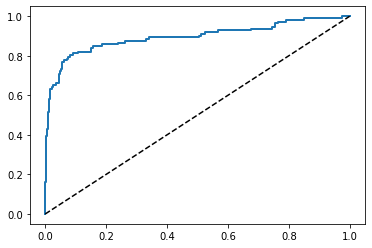

In [106]:
y_scores = rf_imp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def plot_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')

plot_roc(fpr, tpr)

Interestingly, the accuracy increased to 89% with a specific combination of hyperparameters. 

### Top Features

In [134]:
important_features = []
important_features_score = []
for i in range(len(rf_imp.feature_importances_)):
    if rf_imp.feature_importances_[i] > 0.055:
        important_features.append(X_train.columns[i])
        important_features_score.append(round(rf_imp.feature_importances_[i], 3))

df_feature_ranking = pd.DataFrame({'feature': important_features, 'score': important_features_score}).sort_values('score', ascending=False)
print(df_feature_ranking)

                  feature  score
2        Total day charge  0.171
3  Customer service calls  0.137
4    Minutes per eve call  0.059
0   International plan_No  0.057
1  International plan_Yes  0.055


In conclusion, the **total day charge, number of customer service calls, length per evening call, and the presence of an international plan** indicates whether the customer will churn from the telecom service.